In [78]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

(a). 

Notice the down-and-out call option is identitcal to a regular European call option except when the stock prices goes below certain value, the option is worthless. So the part $\mathbb{I}_{S_{u}} \geq B$ implements this feature in the equation, where it takes the value of 0 if stocks goes below $B$, 1 otherwise.

(b).

The SDE yields that $S(t)=S_{0} e^{\left(\mu-\frac{1}{2} \sigma^{2}\right) t+\sigma W_{t}}$, which we implement in the next cell.

In [79]:
t = 0.
T = 1.
r = 0.02
sigma = 0.2
S0 = 100.
N = 252

def S_path(t, T, r, sigma, S0, N):
    dt = T/N
    # standard brownian motion
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt)
    # exponent
    X = (r - 0.5*sigma**2)*np.linspace(dt, T, N) + sigma * W
    S = S0 * np.exp(X)
    return S

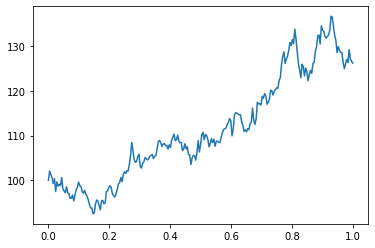

In [80]:
S = S_path(t, T, r, sigma, S0, N)
times = np.linspace(dt, T, N)
plt.plot(np.insert(times,0,0), np.insert(S,0,S0))

(c).

In [81]:
B = 80.
K = 110.
def payoff(S, B, K):
    if all(s > B for s in S):
        return max(S[-1]-K, 0)
    else:
        return 0
print(payoff(S, B, K))

16.256326984876438


In [82]:
numIter = 10**5
def Monte_Carlo_payoff(t, T, r, sigma, S0, N, B, K, numIter):
    sum = np.sum([payoff(S_path(t, T, r, sigma, S0, N), B, K) for i in range(numIter)])
    return (np.exp(-r*(T-t))/numIter)*sum
print(Monte_Carlo_payoff(t, T, r, sigma, S0, N, B, K, numIter))

4.917524720237875
